## Exercise notebook for the first session (60 min)

The exercise notebook involves new concepts not covered in the guided session. You are encouraged to work in groups of 2-4 if that helps to speed things up. Please ask for help from the instructor and/or TAs. The session is time-bound, so make sure you are not stuck at a problem for too long before asking for help.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### 1. Feature engineering on the Titanic dataset to create a new column for group size (30 min):
Loading the [Titanic dataset](https://www.kaggle.com/c/titanic):

In [4]:
path = 'titanic/'
train = pd.read_csv(path + 'train.csv') 
test = pd.read_csv(path + 'test.csv') 

Create a DataFrame named `df` by concatenating the `train` and `test` datasets one below the other. Hint: Use `concat()`.

In [6]:
# df = pd.concat([train, test])

In [4]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Create a new column named *Family* by adding the columns *SibSp* and *Parch* and then add 1 to it. Note: [Here](https://www.kaggle.com/c/titanic/data) is the description for features *SibSp* and *Parch*.

In [5]:
# df['Family'] = df['SibSp'] + df['Parch'] + 1

Now we check the survival rates with respect to the family size.

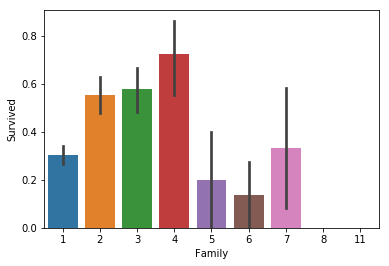

In [7]:
sns.barplot(x='Family', y='Survived', data=df);

Some passengers that appear to be traveling alone by account of their family size were part of a group traveling on the same ticket. To see this, get all the passengers traveling on the ticket "1601" (there are 8 of them).

In [7]:
# df[df['Ticket'] == "1601"]

(8, 12)

One can check that there are many tickets shared among passengers that may or may not be family members.

In [6]:
df['Ticket'].value_counts()[:15]

CA. 2343        11
1601             8
CA 2144          8
347082           7
347077           7
3101295          7
PC 17608         7
S.O.C. 14879     7
347088           6
382652           6
113781           6
19950            6
PC 17757         5
16966            5
349909           5
Name: Ticket, dtype: int64

Create a new column named *TicketCount* that counts the total number of passengers traveling in each passengers' ticket.

Hint: 
- First group passengers based on their tickets using `groupby()` on the *Ticket* column.
- For the grouped object, pick any column that has no missing values.
- Use `transform()` for this unique identifier column with the function `"count"` to create a new column *TicketCount*.

For example, we created *MedianAge* using the following code:   
```df['MedianAge'] = df.groupby('Title')['Age'].transform("median")```

In [6]:
# df['TicketCount'] = df.groupby('Ticket')['Name'].transform("count")

In [ ]:
df.head()

Plot the survival rates based on the *TicketCount* using `sns.barplot()` (see above).

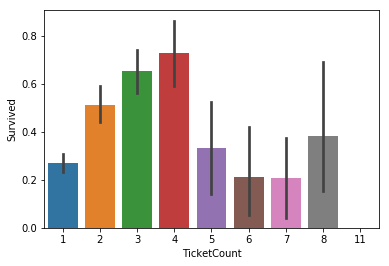

In [9]:
# sns.barplot(x='TicketCount', y='Survived', data=df);

It does seem that the number of co-travelers have an impact on the survival rates.

Create a new column named *GroupSize* by picking the maximum value among the columns *Family* and *TicketCount*.   
Note: We consider groups to be either family members or those traveling on the same ticket.   
Hint: Use built-in `max()` function for pandas on the two relevant columns with the appropriate value for the `axis` parameter. 

In [7]:
# df['GroupSize'] = df[['Family', 'TicketCount']].max(axis=1)

Plot the survival rates based on the *GroupSize* using `sns.barplot()`.

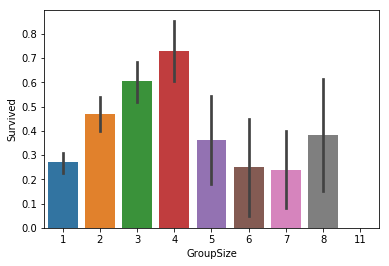

In [11]:
# sns.barplot(x='GroupSize', y='Survived', data=df);

Check the number of rows where *Groupsize* is not equal to *Family*. Similarly, check the number of rows where *TicketCount* is not equal to *Family*.

In [8]:
df[df['GroupSize'] != df['Family']].shape[0], 
df[df['GroupSize'] != df['TicketCount']].shape[0]

(200, 84)

The output must be `(200, 84)`. Check your above code, if you get a different output.

### 2. Creating a new column using grouping on two columns of [Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales) dataset (10 min):

In [39]:
path = 'competitive-data-science-predict-future-sales/'
df = pd.read_csv(path + 'sales_train.csv')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


[The description](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data) for each of the following columns is as follows. 
- date: date in format dd/mm/yyyy
- date_block_num: a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- shop_id: unique identifier of a shop
- item_id: unique identifier of a product
- item_price: current price of an item
- item_cnt_day: number of products sold
       
The aim of the competition is to predict the monthly sales. We are given the daily sales of items in each shop in the column *item_cnt_day*. We want to create a new column named *item_cnt_monthly* that gives the monthly sales of the items using the columns *item_cnt_day* and *date_block_num*. 

Currently, the rows are sorted based on the *date* column. We want them sorted first w.r.t. *date_block_num* and then  w.r.t. *item_id* within each *date_block_num*. Hint: Use `sort_values()` on the two columns: `'date_block_num','item_id'`

In [44]:
# df = df.sort_values(['date_block_num','item_id'])

We sorted the rows so that it will make it easier to check whether our code below is working correctly. For the *date_block_num* equal to 0, we can see that the item with *item_id* 19 is sold once, one with *item_id* 27 is sold 7 times and so on.

In [45]:
df.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
3280,12.01.2013,0,25,19,28.0,1.0
9999,02.01.2013,0,19,27,2499.0,1.0
25924,09.01.2013,0,26,27,2499.0,1.0
42605,11.01.2013,0,2,27,2499.0,1.0
44819,12.01.2013,0,1,27,1890.0,1.0
54389,19.01.2013,0,10,27,1890.0,1.0
65423,18.01.2013,0,31,27,2499.0,1.0
113646,04.01.2013,0,45,27,2499.0,1.0
57746,14.01.2013,0,15,28,549.0,1.0
65420,16.01.2013,0,31,28,549.0,1.0


We can use `groupby()` on the two columns - *date_block_num* and *item_id* and sum the values in the *item_cnt_day* column in each grouping as follows.

In [ ]:
df.groupby(['date_block_num', 'item_id'])['item_cnt_day'].sum()

Create a new column named *item_cnt_monthly* that gives the monthly sales of the items

Hint: Use `transform()` with the function `"sum"` along with `groupby()`.

In [ ]:
# df['item_cnt_monthly'] = df.groupby(['date_block_num', 'item_id'])['item_cnt_day'].transform("sum")

Check that the code indeed worked as expected.

In [ ]:
df.head(25)

### 3. Merging columns from different datasets (20 min):

A simple illustration to merge two datasets using `merge()`

In [55]:
df1 = pd.DataFrame({'CourseCode': ['PHYS024', 'CSCI35', 'ENGR156'], 
                   'CourseName': ['Mechanics and Wave Motion', 
                                  'Computer Science for Insight',
                                 'Intro to Comm & Info Theory']})

df2 = pd.DataFrame({'Professor': ['Zachary Dodds', 'Vatche Sahakian', 
                                  'Timothy Tsai', 'Brian Shuve'],
                    'CourseCode': ['CSCI35', 'PHYS024',  'ENGR156', 'PHYS024']})

df1.head()

,CourseCode,CourseName
0,PHYS024,Mechanics and Wave Motion
1,CSCI35,Computer Science for Insight
2,ENGR156,Intro to Comm & Info Theory


In [54]:
df2.head()

,Professor,CourseCode
0,Zachary Dodds,CSCI35
1,Vatche Sahakian,PHYS024
2,Timothy Tsai,ENGR156
3,Brian Shuve,PHYS024


In [50]:
pd.merge(df2, df1)

,Professor,CourseCode,CourseName
0,Zachary Dodds,CSCI35,Computer Science for Insight
1,Vatche Sahakian,PHYS024,Mechanics and Wave Motion
2,Brian Shuve,PHYS024,Mechanics and Wave Motion
3,Timothy Tsai,ENGR156,Intro to Comm & Info Theory


Please refer to the documents [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) and [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to better grasp how and when to use `merge()` function. 

#### Merging dataframes from [Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis/data) dataset:
Load the four files into separate dataframes:   
`aisles.csv`   
`departments.csv`  
`products.csv`  
`order_products__train.csv`

In [2]:
path = 'instacart-market-basket-analysis/'
dfa = pd.read_csv(path + 'aisles.csv')
dfd = pd.read_csv(path + 'departments.csv')
dfp = pd.read_csv(path + 'products.csv')
dfo = pd.read_csv(path + 'order_products__train.csv')

Familiarize yourself with the dataframes. Hint: Use `head()`.  
Note: You might want to add code cells. Please ask for help unless you already know how to add a code cell.

Get a dataframe consisting of the name of the products along with their aisle names and department names for the order with `order_id` equal to 1.   
Note: dataframe must have ***8 rows and only three columns:
```'product_name', 'aisle', 'department'```***

Hint: 
- First slice out 8 rows from the order_products dataframe that corresponds with `order_id` equal to 1 and save it in a dataframe.
- Use `merge()` multiple times to merge two dataframes at a time starting with the dataset that have a column in common with the dataframe corresponding to 'order_products__train.csv'.
- Finally slice out the 3 selective columns: `'product_name', 'aisle', 'department'`

In [3]:
# df = dfo[dfo['order_id'] == 1]
# df = df.merge(dfp).merge(dfa).merge(dfd)
# df = df[['product_name', 'aisle', 'department']]
# df

,product_name,aisle,department
0,Bulgarian Yogurt,yogurt,dairy eggs
1,Organic 4% Milk Fat Whole Milk Cottage Cheese,other creams cheeses,dairy eggs
2,Organic Whole String Cheese,packaged cheese,dairy eggs
3,Organic Celery Hearts,fresh vegetables,produce
4,Cucumber Kirby,fresh vegetables,produce
5,Bag of Organic Bananas,fresh fruits,produce
6,Organic Hass Avocado,fresh fruits,produce
7,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods


In [4]:
df.shape

(8, 3)

The output should be (8, 3). Please check your code above if you get something else.

#### Exploring csv files (optional)

Dataframes are easily convertible to and from csv (comma seperated text) files. Convert the last dataframe to a csv file using `to_csv()`.

In [21]:
# df.to_csv("FILENAME.csv")

Instructions for the next steps if using Kaggle kernel:
* Commit the kernel so that the output file is generated. You can visit the kernels page (without the "/edit" and instead use "/output" at the end) in the link to download the output file. Please ask for help if the instructions are not clear. 
* Open the csv file using MS-Excel, any text editor or other applications of your choice. 
* Edit the file, save it and upload it to the Kaggle kernel using 'ADD DATASET' option.

Instructions for the next steps if using Jupyter Notebook in your laptop:
* Go to the folder where Notebook is saved and locate the output file.
* Open the csv file using MS-Excel, any text editor or other application of your choice that supports csv files. 
* Edit the file and save it.

Now, read the csv file and check whether the changes are reflected.

### Next steps:

Please pick one or more datasets to explore. Suggestions are given [here](http://www.aashitak.com/ML-Workshops/).